**ZOMATO RESTAURANT DATASET OVERVIEW**

**Explanation**: Imports necessary Python libraries for data manipulation, visualization, and analysis (pandas, numpy, matplotlib, seaborn, plotly).

In [ ]:
 #Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('zomato.csv')

# Display basic information about the dataset
print("🍽️ ZOMATO RESTAURANT DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

🍽️ ZOMATO RESTAURANT DATASET OVERVIEW
Dataset Shape: (148, 7)
Columns: ['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)']

First 5 rows:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns)

**STARTING DATA CLEANING...**

**Explanation**:This cell focuses on cleaning and transforming key columns. It extracts numeric values from the 'rate' column, cleans the 'approx_cost(for two people)' column by removing commas and converting to numeric, and handles missing values in 'rate', 'cost', and 'votes' by filling them with the median or zero. It also creates new categorical columns for 'price_category' and 'rating_category', cleans the 'listed_in(type)' column, and creates a 'service_combo' column.

In [ ]:
#Data Cleaning and Preprocessing
print("🧹 STARTING DATA CLEANING...")
print("="*40)

# Clean rating column - extract numeric values
df['rating_numeric'] = df['rate'].str.extract(r'(\d+\.?\d*)').astype(float)

# Clean cost column - remove commas and convert to numeric
df['cost_numeric'] = pd.to_numeric(
    df['approx_cost(for two people)'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# Clean votes column
df['votes_numeric'] = pd.to_numeric(df['votes'], errors='coerce')

# Handle missing values with appropriate strategies
df['rating_numeric'].fillna(df['rating_numeric'].median(), inplace=True)
df['cost_numeric'].fillna(df['cost_numeric'].median(), inplace=True)
df['votes_numeric'].fillna(0, inplace=True)

# Create price categories based on cost distribution
cost_quartiles = df['cost_numeric'].quantile([0.25, 0.5, 0.75])
df['price_category'] = pd.cut(
    df['cost_numeric'],
    bins=[0, cost_quartiles[0.25], cost_quartiles[0.5], cost_quartiles[0.75], float('inf')],
    labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'],
    include_lowest=True
)

# Create rating categories
df['rating_category'] = pd.cut(
    df['rating_numeric'],
    bins=[0, 3.0, 3.5, 4.0, 5.0],
    labels=['Poor', 'Average', 'Good', 'Excellent'],
    include_lowest=True
)

# Clean restaurant types
df['restaurant_type'] = df['listed_in(type)'].str.strip()

# Create service combination column
df['service_combo'] = (
    df['online_order'] + ' Online / ' + df['book_table'] + ' Booking'
)

print(f"✅ Data cleaning completed!")
print(f"Final dataset shape: {df.shape}")
print(f"Unique restaurant types: {df['restaurant_type'].nunique()}")
print(f"Rating range: {df['rating_numeric'].min():.1f} - {df['rating_numeric'].max():.1f}")
print(f"Cost range: ₹{df['cost_numeric'].min():.0f} - ₹{df['cost_numeric'].max():.0f}")

# Display cleaned data sample
print("\nCleaned Data Sample:")
print(df[['name', 'rating_numeric', 'cost_numeric', 'price_category', 'rating_category']].head())

# Check for any remaining missing values
print(f"\nRemaining Missing Values:")
print(df[['rating_numeric', 'cost_numeric', 'votes_numeric']].isnull().sum())

🧹 STARTING DATA CLEANING...
✅ Data cleaning completed!
Final dataset shape: (148, 14)
Unique restaurant types: 4
Rating range: 2.6 - 4.6
Cost range: ₹100 - ₹950

Cleaned Data Sample:
                    name  rating_numeric  cost_numeric price_category  \
0                  Jalsa             4.1           800         Luxury   
1         Spice Elephant             4.1           800         Luxury   
2        San Churro Cafe             3.8           800         Luxury   
3  Addhuri Udupi Bhojana             3.7           300      Mid-Range   
4          Grand Village             3.8           600        Premium   

  rating_category  
0       Excellent  
1       Excellent  
2            Good  
3            Good  
4            Good  

Remaining Missing Values:
rating_numeric    0
cost_numeric      0
votes_numeric     0
dtype: int64


**BASIC STATISTICS & OVERVIEW**

**Explanation**:Provides a foundational overview of the dataset. It prints key statistics about the total number of restaurants, unique names, and types. It calculates and displays descriptive statistics for ratings, costs, and votes, including means, medians, and ranges. It also analyzes the availability of online orders and table bookings and shows the distribution of restaurant types, price categories, and rating categories.

In [ ]:
# Basic Statistics and Overview
print("📊 BASIC STATISTICS & OVERVIEW")
print("="*60)

# Dataset overview
print(f"📋 Dataset Overview:")
print(f"   Total Restaurants: {len(df)}")
print(f"   Unique Restaurant Names: {df['name'].nunique()}")
print(f"   Restaurant Types: {df['restaurant_type'].nunique()}")

# Rating statistics
print(f"\n⭐ Rating Statistics:")
print(f"   Average Rating: {df['rating_numeric'].mean():.2f}")
print(f"   Median Rating: {df['rating_numeric'].median():.2f}")
print(f"   Standard Deviation: {df['rating_numeric'].std():.2f}")
print(f"   Highest Rated: {df['rating_numeric'].max():.1f}")
print(f"   Lowest Rated: {df['rating_numeric'].min():.1f}")

# Cost statistics
print(f"\n💰 Cost Statistics:")
print(f"   Average Cost for Two: ₹{df['cost_numeric'].mean():.0f}")
print(f"   Median Cost for Two: ₹{df['cost_numeric'].median():.0f}")
print(f"   Most Expensive: ₹{df['cost_numeric'].max():.0f}")
print(f"   Most Affordable: ₹{df['cost_numeric'].min():.0f}")

# Service statistics
online_count = df['online_order'].value_counts().get('Yes', 0)
booking_count = df['book_table'].value_counts().get('Yes', 0)

print(f"\n🚚 Service Statistics:")
print(f"   Online Order Available: {online_count} ({online_count/len(df)*100:.1f}%)")
print(f"   Table Booking Available: {booking_count} ({booking_count/len(df)*100:.1f}%)")

# Votes statistics
print(f"\n👥 Engagement Statistics:")
print(f"   Average Votes: {df['votes_numeric'].mean():.0f}")
print(f"   Total Votes: {df['votes_numeric'].sum():.0f}")
print(f"   Most Voted Restaurant: {df.loc[df['votes_numeric'].idxmax(), 'name']} ({df['votes_numeric'].max()} votes)")

# Display descriptive statistics
print(f"\n📈 Detailed Statistical Summary:")
print(df[['rating_numeric', 'cost_numeric', 'votes_numeric']].describe())

# Restaurant type distribution
print(f"\n🍽️ Top 10 Restaurant Types:")
restaurant_type_counts = df['restaurant_type'].value_counts().head(10)
for resto_type, count in restaurant_type_counts.items():
    percentage = (count / len(df) * 100)
    print(f"   {resto_type}: {count} ({percentage:.1f}%)")

# Price and rating category distributions
print(f"\n💎 Price Category Distribution:")
price_dist = df['price_category'].value_counts()
for category, count in price_dist.items():
    percentage = (count / len(df) * 100)
    print(f"   {category}: {count} ({percentage:.1f}%)")

print(f"\n⭐ Rating Category Distribution:")
rating_dist = df['rating_category'].value_counts()
for category, count in rating_dist.items():
    percentage = (count / len(df) * 100)
    print(f"   {category}: {count} ({percentage:.1f}%)")

📊 BASIC STATISTICS & OVERVIEW
📋 Dataset Overview:
   Total Restaurants: 148
   Unique Restaurant Names: 145
   Restaurant Types: 4

⭐ Rating Statistics:
   Average Rating: 3.63
   Median Rating: 3.70
   Standard Deviation: 0.40
   Highest Rated: 4.6
   Lowest Rated: 2.6

💰 Cost Statistics:
   Average Cost for Two: ₹418
   Median Cost for Two: ₹400
   Most Expensive: ₹950
   Most Affordable: ₹100

🚚 Service Statistics:
   Online Order Available: 58 (39.2%)
   Table Booking Available: 8 (5.4%)

👥 Engagement Statistics:
   Average Votes: 265
   Total Votes: 39192
   Most Voted Restaurant: Empire Restaurant (4884 votes)

📈 Detailed Statistical Summary:
       rating_numeric  cost_numeric  votes_numeric
count      148.000000    148.000000     148.000000
mean         3.633108    418.243243     264.810811
std          0.402271    223.085098     653.676951
min          2.600000    100.000000       0.000000
25%          3.300000    200.000000       6.750000
50%          3.700000    400.000000  

**RESTAURANT TYPE & RATING ANALYSIS**

**Explanation:**delves deeper into the relationship between restaurant types and ratings. It groups the data by restaurant type to calculate aggregate statistics (mean rating, cost, votes, service availability). It analyzes average ratings based on online order availability, table booking availability, and price category. Finally, it generates multiple visualizations, including bar plots for type distribution and average ratings, a histogram for rating distribution, and a scatter plot of rating vs cost.

🍽️ RESTAURANT TYPE & RATING ANALYSIS
Detailed Analysis by Restaurant Type:
                 rating_numeric_mean  rating_numeric_std  \
restaurant_type                                            
Buffet                          3.84                0.19   
Cafes                           3.77                0.39   
Dining                          3.57                0.37   
other                           3.91                0.68   

                 rating_numeric_count  cost_numeric_mean  cost_numeric_median  \
restaurant_type                                                                 
Buffet                              7             671.43                800.0   
Cafes                              23             545.65                550.0   
Dining                            110             357.27                300.0   
other                               8             668.75                700.0   

                 votes_numeric_mean  votes_numeric_sum  online_order_<lambda>

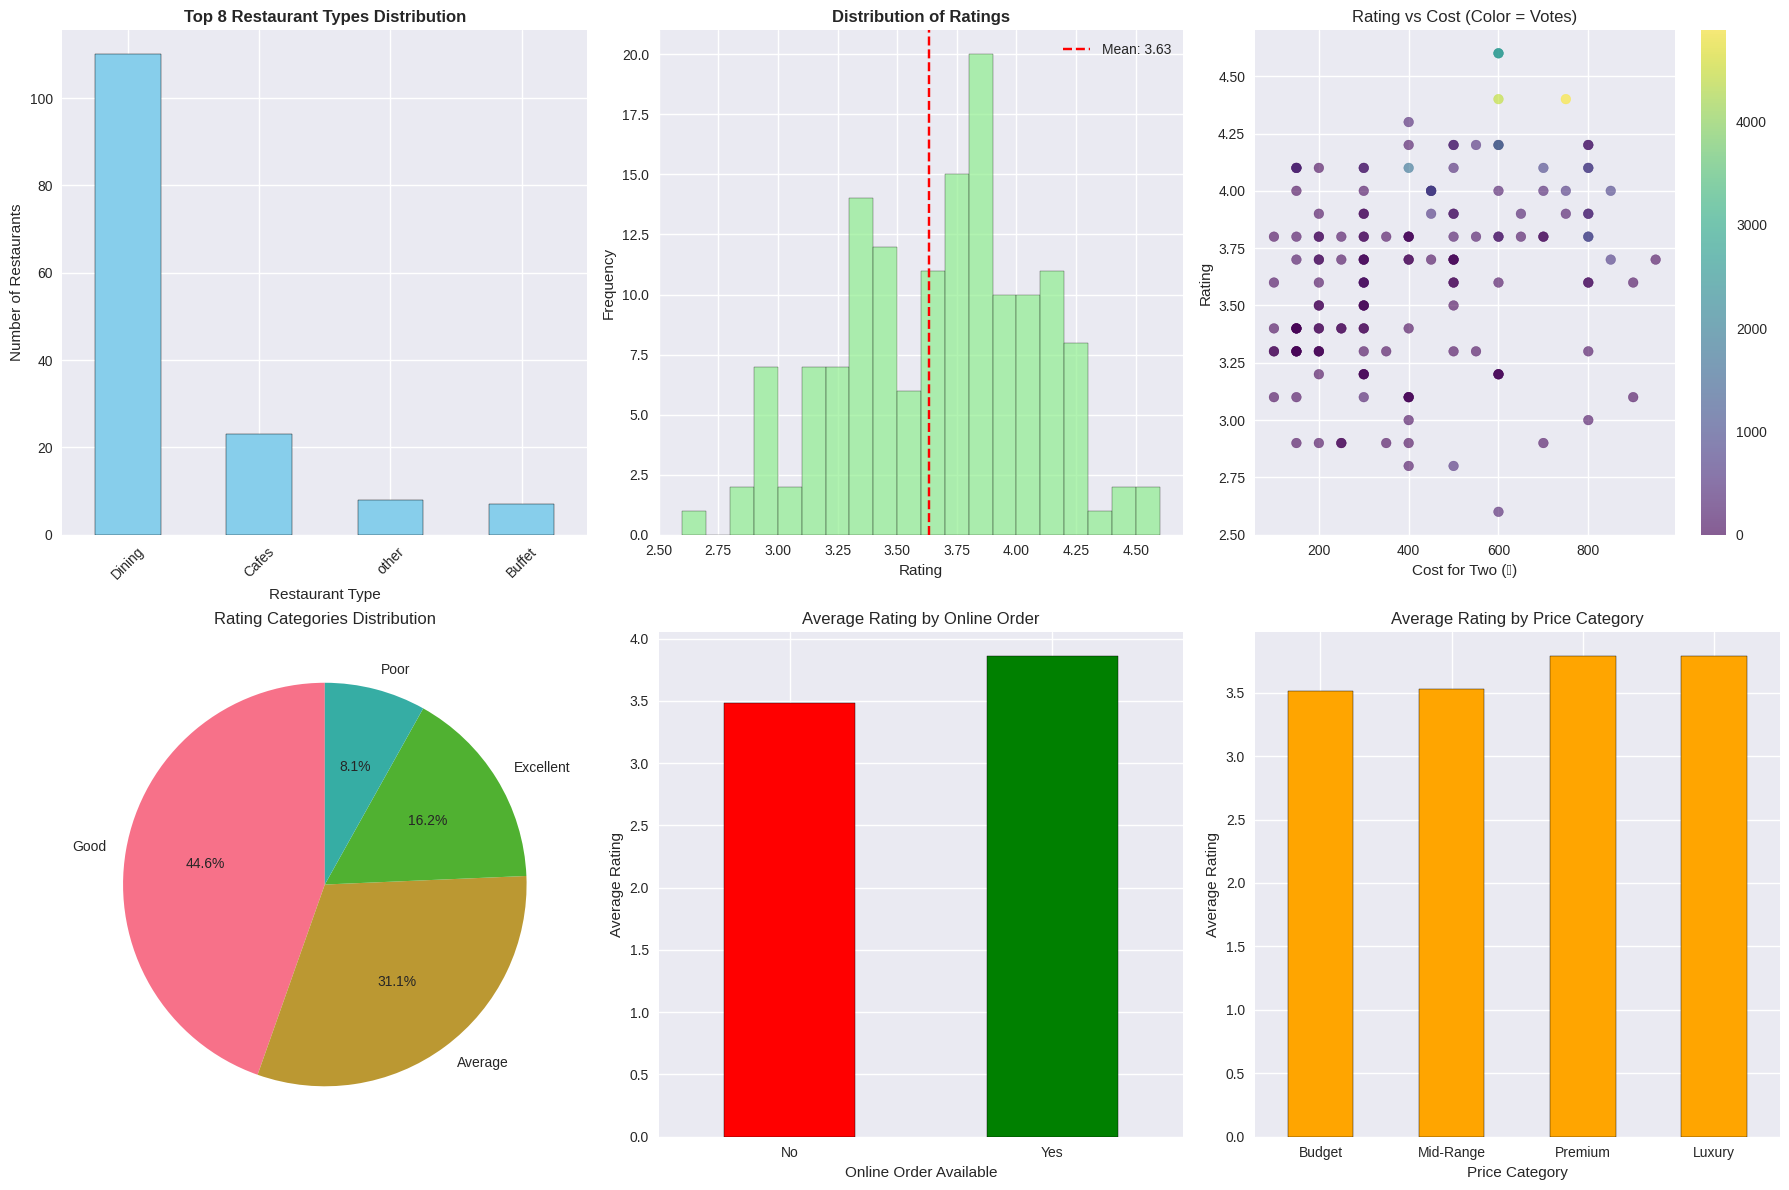


🌟 High-Rated Restaurants Analysis (≥4.0):
   Count: 34 (23.0%)
   Average Cost: ₹509
   Most Common Type: Dining

🏆 Best Rated Restaurant by Type:
   restaurant_type           name  rating_numeric  cost_numeric
0           Buffet          Jalsa             4.1           800
7            Cafes         Onesta             4.6           600
86          Dining  Meghana Foods             4.4           600
44           other         Onesta             4.6           600


In [ ]:
# Restaurant Type and Rating Analysis with Visualizations
print("🍽️ RESTAURANT TYPE & RATING ANALYSIS")
print("="*60)

# Restaurant type analysis
type_analysis = df.groupby('restaurant_type').agg({
    'rating_numeric': ['mean', 'std', 'count'],
    'cost_numeric': ['mean', 'median'],
    'votes_numeric': ['mean', 'sum'],
    'online_order': lambda x: (x == 'Yes').sum(),
    'book_table': lambda x: (x == 'Yes').sum()
}).round(2)

# Flatten column names
type_analysis.columns = ['_'.join(col).strip() for col in type_analysis.columns]

print("Detailed Analysis by Restaurant Type:")
print(type_analysis.head(10))

# Rating analysis by different factors
print(f"\n⭐ RATING ANALYSIS BY FACTORS:")

# By online order
online_rating = df.groupby('online_order')['rating_numeric'].mean()
print(f"   Online Order - Yes: {online_rating.get('Yes', 0):.2f}, No: {online_rating.get('No', 0):.2f}")

# By table booking
booking_rating = df.groupby('book_table')['rating_numeric'].mean()
print(f"   Table Booking - Yes: {booking_rating.get('Yes', 0):.2f}, No: {booking_rating.get('No', 0):.2f}")

# By price category
price_rating = df.groupby('price_category')['rating_numeric'].mean()
print(f"   Price Categories:")
for category, rating in price_rating.items():
    print(f"      {category}: {rating:.2f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Restaurant type distribution
type_counts = df['restaurant_type'].value_counts().head(8)
type_counts.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Top 8 Restaurant Types Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Restaurant Type')
axes[0,0].set_ylabel('Number of Restaurants')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Rating distribution histogram
axes[0,1].hist(df['rating_numeric'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribution of Ratings', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(df['rating_numeric'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["rating_numeric"].mean():.2f}')
axes[0,1].legend()

# 3. Rating vs Cost scatter plot
scatter = axes[0,2].scatter(df['cost_numeric'], df['rating_numeric'],
                           alpha=0.6, c=df['votes_numeric'], cmap='viridis')
axes[0,2].set_title('Rating vs Cost (Color = Votes)')
axes[0,2].set_xlabel('Cost for Two (₹)')
axes[0,2].set_ylabel('Rating')
plt.colorbar(scatter, ax=axes[0,2])

# 4. Rating category pie chart
rating_dist = df['rating_category'].value_counts()
rating_dist.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Rating Categories Distribution')
axes[1,0].set_ylabel('')

# 5. Rating by online order
online_rating.plot(kind='bar', ax=axes[1,1], color=['red', 'green'], edgecolor='black')
axes[1,1].set_title('Average Rating by Online Order')
axes[1,1].set_xlabel('Online Order Available')
axes[1,1].set_ylabel('Average Rating')
axes[1,1].tick_params(axis='x', rotation=0)

# 6. Rating by price category
price_rating.plot(kind='bar', ax=axes[1,2], color='orange', edgecolor='black')
axes[1,2].set_title('Average Rating by Price Category')
axes[1,2].set_xlabel('Price Category')
axes[1,2].set_ylabel('Average Rating')
axes[1,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# High-rated restaurants analysis
high_rated = df[df['rating_numeric'] >= 4.0]
print(f"\n🌟 High-Rated Restaurants Analysis (≥4.0):")
print(f"   Count: {len(high_rated)} ({len(high_rated)/len(df)*100:.1f}%)")
print(f"   Average Cost: ₹{high_rated['cost_numeric'].mean():.0f}")
print(f"   Most Common Type: {high_rated['restaurant_type'].mode().iloc[0]}")

# Top rated restaurants by type
print(f"\n🏆 Best Rated Restaurant by Type:")
top_by_type = df.loc[df.groupby('restaurant_type')['rating_numeric'].idxmax()]
print(top_by_type[['restaurant_type', 'name', 'rating_numeric', 'cost_numeric']].head())

**COST ANALYSIS and SERVICE ANALYSIS**

**Explantion:**It focuses on analyzing restaurant costs and service options. It provides cost statistics by restaurant type and calculates the correlation between cost and rating, and cost and votes. It identifies the most expensive and best value restaurants. It then analyzes the prevalence of online orders and table bookings, including combinations of these services, and examines the impact of service availability on average rating and votes. Various plots visualize cost distribution, price categories, and service availability.

💰 COST ANALYSIS
Cost Analysis by Restaurant Type (Top 10):
                  Mean  Median  Min  Max  Std Dev
restaurant_type                                  
Buffet           671.0   800.0  300  800    189.0
Cafes            546.0   550.0  200  900    166.0
Dining           357.0   300.0  100  950    207.0
other            669.0   700.0  500  800    122.0

📊 Price Impact Analysis:
   Price-Rating Correlation: 0.275
   Price-Votes Correlation: 0.324

💎 Top 5 Most Expensive Restaurants:
                name  cost_numeric  rating_numeric restaurant_type
Ayda Persian Kitchen           950             3.7          Dining
     Cafe Coffee Day           900             3.6           Cafes
       K27 - The Pub           900             3.1          Dining
       Beijing Bites           850             3.7          Dining
     Jeet Restaurant           850             4.0          Dining

🏅 Top 5 Best Value for Money Restaurants:
                     name  rating_numeric  cost_numeric  value_s

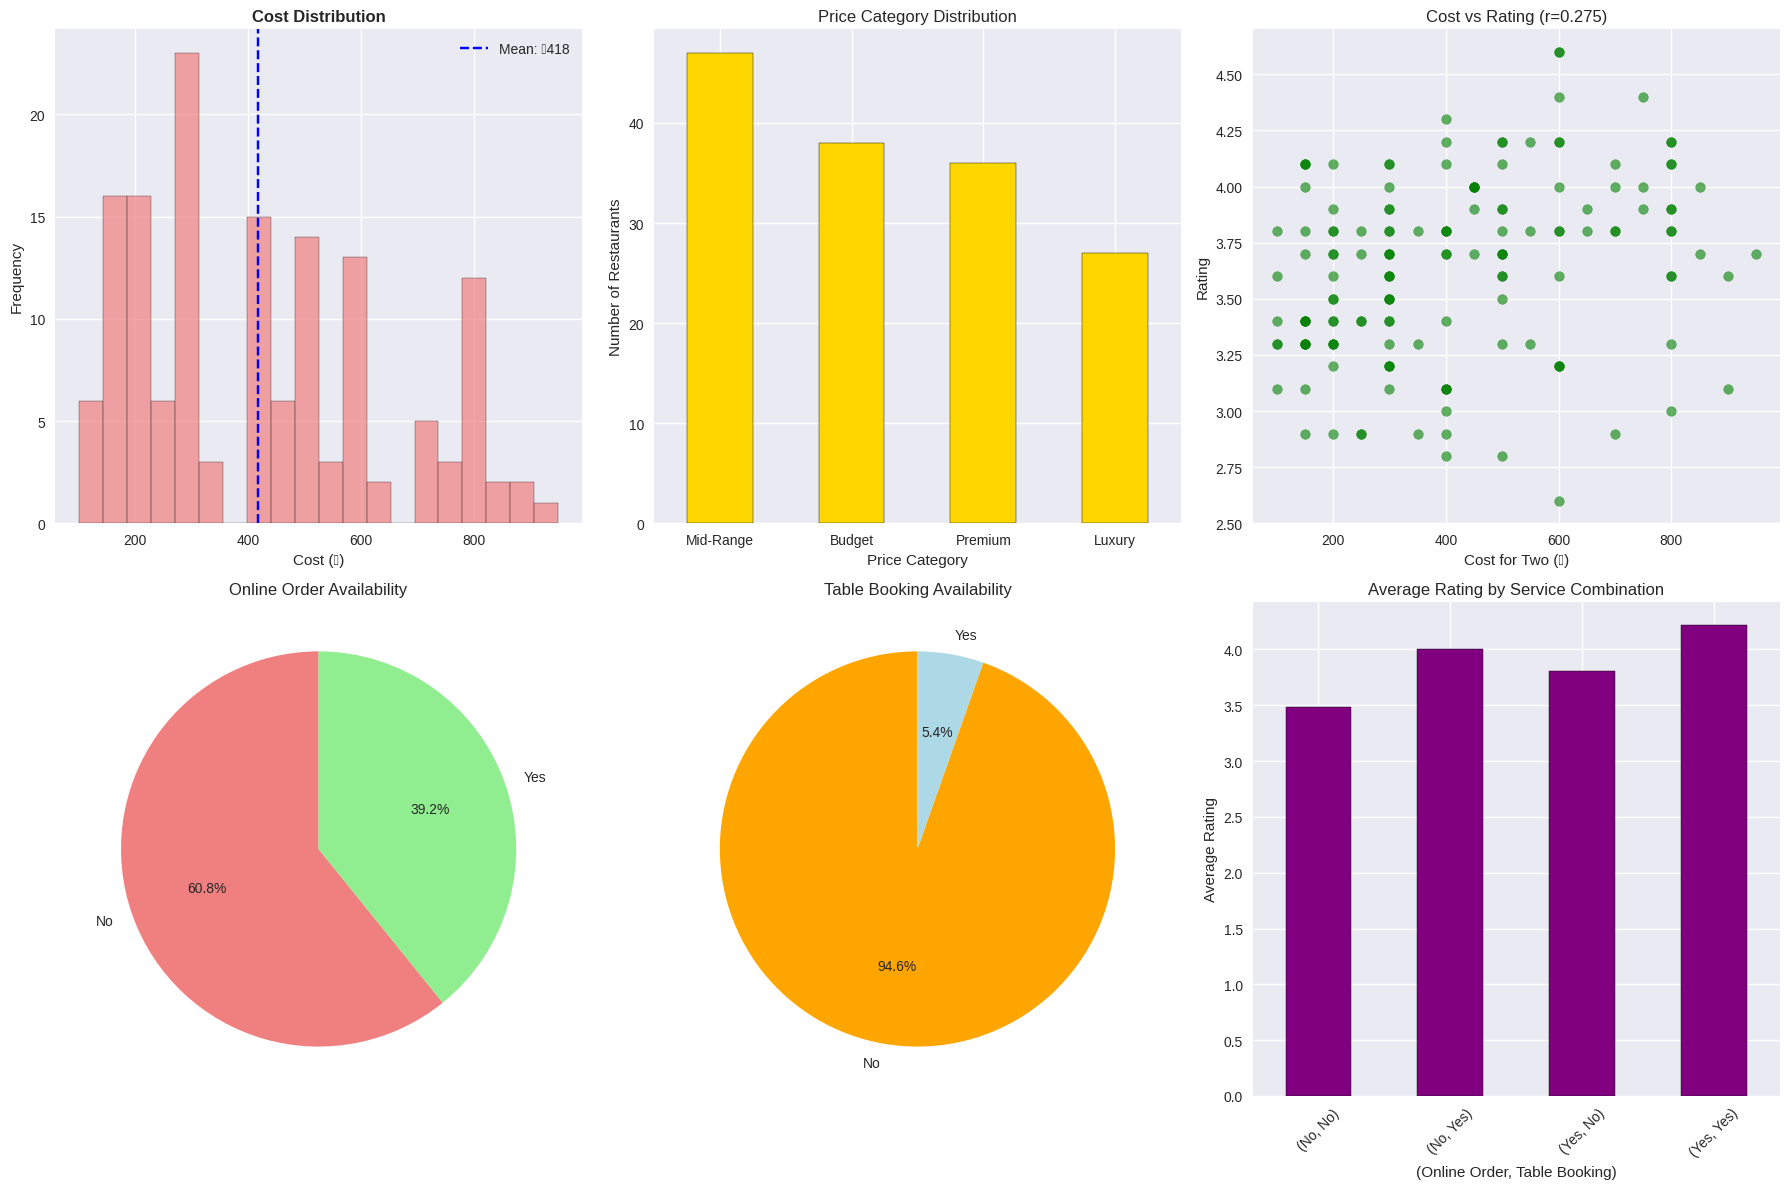

In [ ]:
#Cost and Service Analysis
print("💰 COST ANALYSIS")
print("="*50)

# Cost statistics by restaurant type
cost_by_type = df.groupby('restaurant_type').agg({
    'cost_numeric': ['mean', 'median', 'min', 'max', 'std']
}).round(0)
cost_by_type.columns = ['Mean', 'Median', 'Min', 'Max', 'Std Dev']

print("Cost Analysis by Restaurant Type (Top 10):")
print(cost_by_type.head(10))

# Price vs performance correlations
price_rating_corr = df['cost_numeric'].corr(df['rating_numeric'])
price_votes_corr = df['cost_numeric'].corr(df['votes_numeric'])

print(f"\n📊 Price Impact Analysis:")
print(f"   Price-Rating Correlation: {price_rating_corr:.3f}")
print(f"   Price-Votes Correlation: {price_votes_corr:.3f}")

# Most expensive and best value restaurants
print(f"\n💎 Top 5 Most Expensive Restaurants:")
expensive = df.nlargest(5, 'cost_numeric')[['name', 'cost_numeric', 'rating_numeric', 'restaurant_type']]
print(expensive.to_string(index=False))

# Best value analysis
df['value_score'] = df['rating_numeric'] / (df['cost_numeric'] / 100)
print(f"\n🏅 Top 5 Best Value for Money Restaurants:")
best_value = df.nlargest(5, 'value_score')[['name', 'rating_numeric', 'cost_numeric', 'value_score']]
print(best_value.to_string(index=False))

print(f"\n🚚 SERVICE ANALYSIS")
print("="*50)

# Service statistics
online_stats = df['online_order'].value_counts()
booking_stats = df['book_table'].value_counts()

print("Online Order Statistics:")
for service, count in online_stats.items():
    percentage = (count / len(df) * 100)
    print(f"   {service}: {count} restaurants ({percentage:.1f}%)")

print("\nTable Booking Statistics:")
for service, count in booking_stats.items():
    percentage = (count / len(df) * 100)
    print(f"   {service}: {count} restaurants ({percentage:.1f}%)")

# Service combination analysis
service_combo_stats = df['service_combo'].value_counts()
print(f"\nService Combination Analysis:")
for combo, count in service_combo_stats.items():
    percentage = (count / len(df) * 100)
    print(f"   {combo}: {count} restaurants ({percentage:.1f}%)")

# Service impact on performance
service_impact = df.groupby(['online_order', 'book_table']).agg({
    'rating_numeric': ['mean', 'count'],
    'cost_numeric': 'mean',
    'votes_numeric': ['mean', 'sum']
}).round(2)

print(f"\nService Impact on Performance:")
print(service_impact)

# Create cost and service visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Cost distribution
axes[0,0].hist(df['cost_numeric'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Cost Distribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Cost (₹)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['cost_numeric'].mean(), color='blue', linestyle='--',
                  label=f'Mean: ₹{df["cost_numeric"].mean():.0f}')
axes[0,0].legend()

# Price category distribution
price_dist = df['price_category'].value_counts()
price_dist.plot(kind='bar', ax=axes[0,1], color='gold', edgecolor='black')
axes[0,1].set_title('Price Category Distribution')
axes[0,1].set_xlabel('Price Category')
axes[0,1].set_ylabel('Number of Restaurants')
axes[0,1].tick_params(axis='x', rotation=0)

# Cost vs Rating scatter
axes[0,2].scatter(df['cost_numeric'], df['rating_numeric'], alpha=0.6, color='green')
axes[0,2].set_title(f'Cost vs Rating (r={price_rating_corr:.3f})')
axes[0,2].set_xlabel('Cost for Two (₹)')
axes[0,2].set_ylabel('Rating')

# Online order pie chart
online_stats.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%',
                 colors=['lightcoral', 'lightgreen'], startangle=90)
axes[1,0].set_title('Online Order Availability')
axes[1,0].set_ylabel('')

# Table booking pie chart
booking_stats.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%',
                  colors=['orange', 'lightblue'], startangle=90)
axes[1,1].set_title('Table Booking Availability')
axes[1,1].set_ylabel('')

# Service impact on rating
service_rating = df.groupby(['online_order', 'book_table'])['rating_numeric'].mean()
service_rating.plot(kind='bar', ax=axes[1,2], color='purple', edgecolor='black')
axes[1,2].set_title('Average Rating by Service Combination')
axes[1,2].set_xlabel('(Online Order, Table Booking)')
axes[1,2].set_ylabel('Average Rating')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**TOP PERFORMERS ANALYSIS and 🔗 CORRELATION ANALYSIS**

**Explantion:**This identifies and highlights top-performing restaurants based on rating, votes, and a calculated 'value score'. It lists the highest-rated, most-voted, and best-value restaurants. It also identifies "Premium" (high cost, high rating) and "Popular" (high votes, good rating) restaurants. Finally, it calculates and visualizes the correlation matrix for numerical features (rating, cost, votes) to understand their relationships.

🏆 TOP PERFORMERS ANALYSIS
🌟 Top 10 Highest Rated Restaurants:
                  name  rating_numeric  cost_numeric  votes_numeric restaurant_type online_order book_table
                Onesta             4.6           600           2556           Cafes          Yes        Yes
                Onesta             4.6           600           2556           other          Yes        Yes
     Empire Restaurant             4.4           750           4884           other          Yes         No
         Meghana Foods             4.4           600           4401          Dining          Yes         No
Corner House Ice Cream             4.3           400            345          Dining           No         No
             Smacznego             4.2           550            504           Cafes          Yes         No
          Cafe Shuffle             4.2           600            150           Cafes          Yes        Yes
      The Coffee Shack             4.2           500            164       

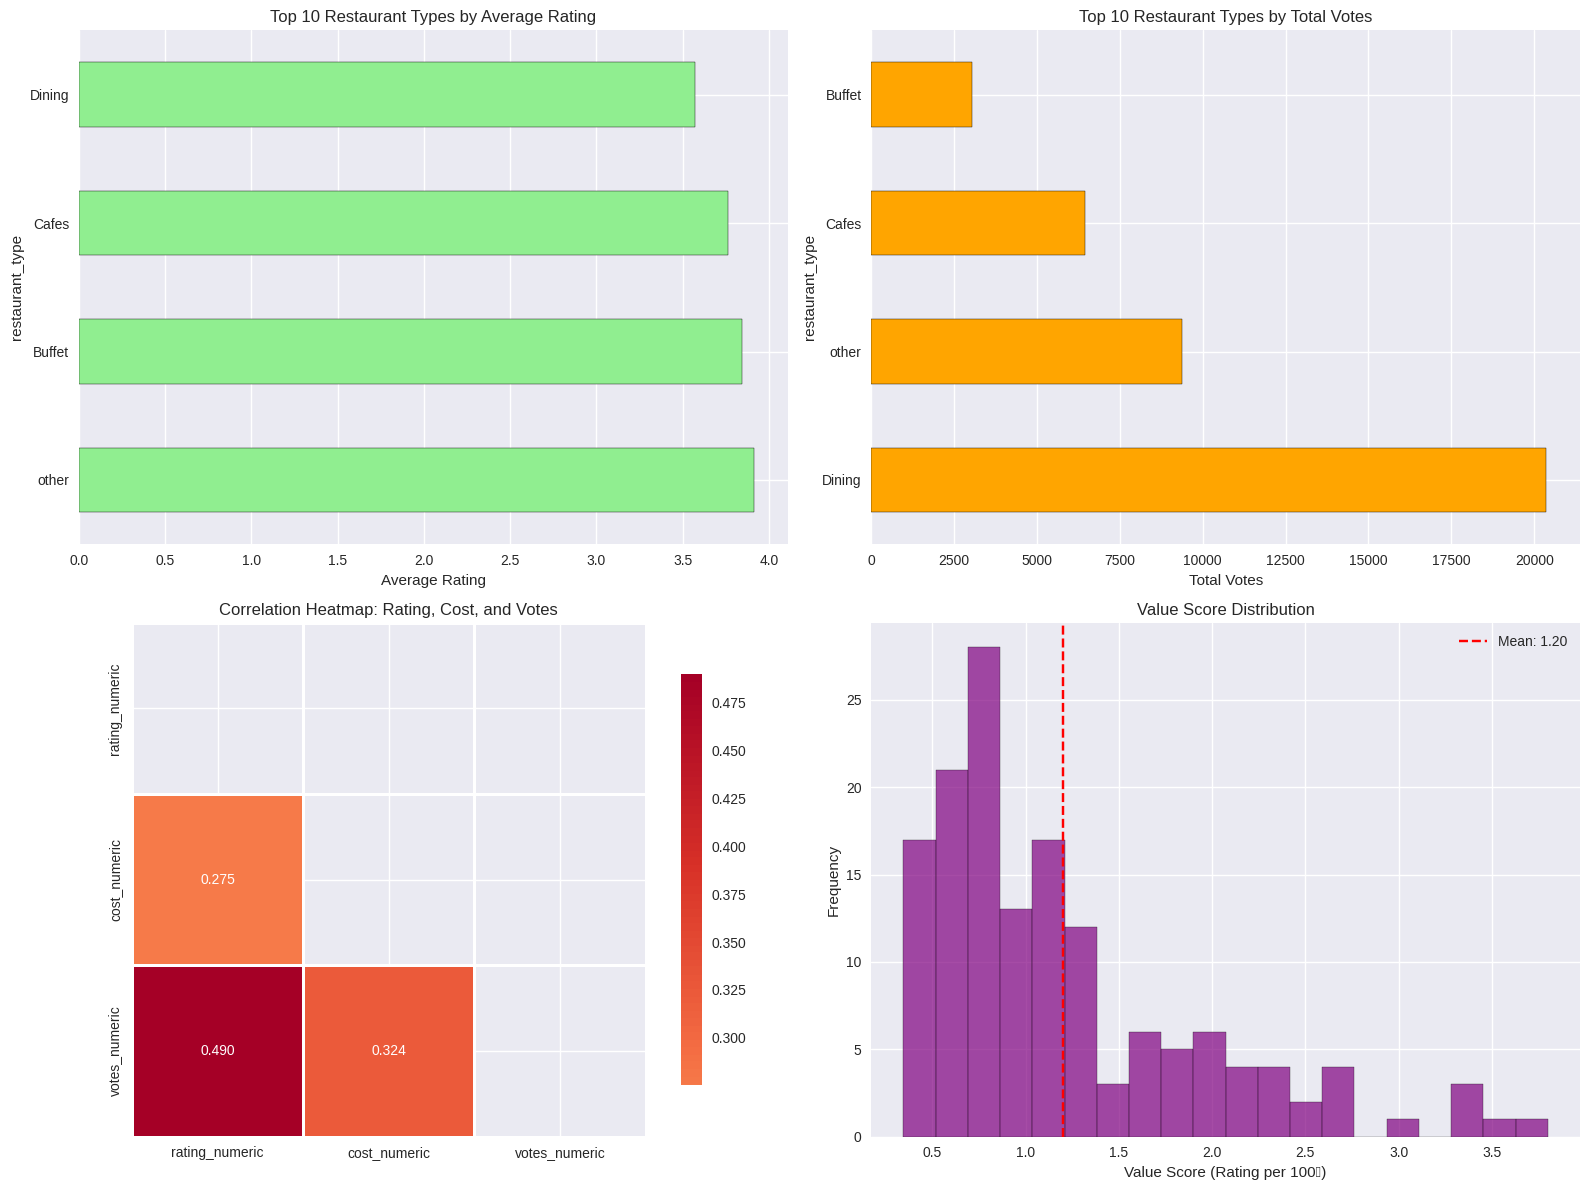


📊 PERFORMANCE SUMMARY:
   Total Restaurants Analyzed: 148
   High-Rated (≥4.0): 34 (23.0%)
   Premium Restaurants: 15
   Popular Restaurants: 34
   Best Value Options: 31
   Restaurants with Both Services: 7

🎯 KEY PERFORMANCE INSIGHTS:
   Online vs No Online Ordering: 3.86 vs 3.49
   Table Booking vs No Booking: 4.19 vs 3.60
   Expensive vs Budget Restaurants: 3.79 vs 3.51


In [ ]:
# Top Performers and Correlation Analysis
print("🏆 TOP PERFORMERS ANALYSIS")
print("="*60)

# Top rated restaurants
print("🌟 Top 10 Highest Rated Restaurants:")
top_rated = df.nlargest(10, 'rating_numeric')[
    ['name', 'rating_numeric', 'cost_numeric', 'votes_numeric', 'restaurant_type', 'online_order', 'book_table']
]
print(top_rated.to_string(index=False))

# Most voted restaurants
print(f"\n👥 Top 10 Most Voted Restaurants:")
most_voted = df.nlargest(10, 'votes_numeric')[
    ['name', 'votes_numeric', 'rating_numeric', 'cost_numeric', 'restaurant_type']
]
print(most_voted.to_string(index=False))

# Best value for money restaurants
print(f"\n💎 Top 10 Best Value for Money Restaurants:")
best_value = df.nlargest(10, 'value_score')[
    ['name', 'rating_numeric', 'cost_numeric', 'value_score', 'restaurant_type']
]
print(best_value.to_string(index=False))

# Premium restaurants (high cost, high rating)
premium_restaurants = df[
    (df['cost_numeric'] >= df['cost_numeric'].quantile(0.75)) &
    (df['rating_numeric'] >= 4.0)
].sort_values('rating_numeric', ascending=False)

print(f"\n👑 Premium Restaurants (High Cost + High Rating): {len(premium_restaurants)}")
if len(premium_restaurants) > 0:
    print(premium_restaurants[['name', 'rating_numeric', 'cost_numeric', 'restaurant_type']].head().to_string(index=False))

# Popular restaurants (high votes, good rating)
popular_restaurants = df[
    (df['votes_numeric'] >= df['votes_numeric'].quantile(0.75)) &
    (df['rating_numeric'] >= 3.5)
].sort_values('votes_numeric', ascending=False)

print(f"\n🔥 Popular Restaurants (High Votes + Good Rating): {len(popular_restaurants)}")
if len(popular_restaurants) > 0:
    print(popular_restaurants[['name', 'votes_numeric', 'rating_numeric', 'restaurant_type']].head().to_string(index=False))

print(f"\n🔗 CORRELATION ANALYSIS")
print("="*60)

# Correlation matrix
numerical_cols = ['rating_numeric', 'cost_numeric', 'votes_numeric']
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Interpretation of correlations
print(f"\nCorrelation Insights:")
rating_cost_corr = correlation_matrix.loc['rating_numeric', 'cost_numeric']
rating_votes_corr = correlation_matrix.loc['rating_numeric', 'votes_numeric']
cost_votes_corr = correlation_matrix.loc['cost_numeric', 'votes_numeric']

print(f"   Rating vs Cost: {rating_cost_corr:.3f} ({'Positive' if rating_cost_corr > 0 else 'Negative'} correlation)")
print(f"   Rating vs Votes: {rating_votes_corr:.3f} ({'Positive' if rating_votes_corr > 0 else 'Negative'} correlation)")
print(f"   Cost vs Votes: {cost_votes_corr:.3f} ({'Positive' if cost_votes_corr > 0 else 'Negative'} correlation)")

# Create visualizations for top performers and correlations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top restaurant types by average rating
top_types_rating = df.groupby('restaurant_type')['rating_numeric'].mean().sort_values(ascending=False).head(10)
top_types_rating.plot(kind='barh', ax=axes[0,0], color='lightgreen', edgecolor='black')
axes[0,0].set_title('Top 10 Restaurant Types by Average Rating')
axes[0,0].set_xlabel('Average Rating')

# Top restaurant types by total votes
top_types_votes = df.groupby('restaurant_type')['votes_numeric'].sum().sort_values(ascending=False).head(10)
top_types_votes.plot(kind='barh', ax=axes[0,1], color='orange', edgecolor='black')
axes[0,1].set_title('Top 10 Restaurant Types by Total Votes')
axes[0,1].set_xlabel('Total Votes')

# Correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', ax=axes[1,0], cbar_kws={"shrink": .8},
            linewidths=1, linecolor='white')
axes[1,0].set_title('Correlation Heatmap: Rating, Cost, and Votes')

# Value score distribution
axes[1,1].hist(df['value_score'], bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[1,1].set_title('Value Score Distribution')
axes[1,1].set_xlabel('Value Score (Rating per 100₹)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(df['value_score'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["value_score"].mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Performance summary by categories
print(f"\n📊 PERFORMANCE SUMMARY:")
print(f"   Total Restaurants Analyzed: {len(df)}")
print(f"   High-Rated (≥4.0): {len(df[df['rating_numeric'] >= 4.0])} ({len(df[df['rating_numeric'] >= 4.0])/len(df)*100:.1f}%)")
print(f"   Premium Restaurants: {len(premium_restaurants)}")
print(f"   Popular Restaurants: {len(popular_restaurants)}")
print(f"   Best Value Options: {len(df[df['value_score'] >= df['value_score'].quantile(0.8)])}")
print(f"   Restaurants with Both Services: {len(df[(df['online_order']=='Yes') & (df['book_table']=='Yes')])}")

# Calculate additional insights
print(f"\n🎯 KEY PERFORMANCE INSIGHTS:")
avg_rating_online = df[df['online_order']=='Yes']['rating_numeric'].mean()
avg_rating_no_online = df[df['online_order']=='No']['rating_numeric'].mean()
print(f"   Online vs No Online Ordering: {avg_rating_online:.2f} vs {avg_rating_no_online:.2f}")

avg_rating_booking = df[df['book_table']=='Yes']['rating_numeric'].mean()
avg_rating_no_booking = df[df['book_table']=='No']['rating_numeric'].mean()
print(f"   Table Booking vs No Booking: {avg_rating_booking:.2f} vs {avg_rating_no_booking:.2f}")

expensive_avg_rating = df[df['cost_numeric'] >= df['cost_numeric'].quantile(0.75)]['rating_numeric'].mean()
cheap_avg_rating = df[df['cost_numeric'] <= df['cost_numeric'].quantile(0.25)]['rating_numeric'].mean()
print(f"   Expensive vs Budget Restaurants: {expensive_avg_rating:.2f} vs {cheap_avg_rating:.2f}")

**BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS**

**Explantion:**This cell synthesizes the findings from previous analyses to generate business insights and strategic recommendations. It analyzes the impact of online ordering and table booking on performance, examines price category and restaurant type performance, identifies market opportunities in underrepresented categories, discusses the cost-rating correlation, and analyzes factors contributing to high customer engagement. It concludes with a list of key insights and actionable strategies.

In [ ]:
#Business Insights and Strategic Recommendations (Continued)
print("💡 BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS")
print("="*80)

insights = []
recommendations = []

# Service Impact Analysis
online_yes_rating = df[df['online_order'] == 'Yes']['rating_numeric'].mean()
online_no_rating = df[df['online_order'] == 'No']['rating_numeric'].mean()
online_yes_votes = df[df['online_order'] == 'Yes']['votes_numeric'].mean()
online_no_votes = df[df['online_order'] == 'No']['votes_numeric'].mean()

if online_yes_rating > online_no_rating:
    improvement = ((online_yes_rating/online_no_rating - 1)*100)
    insights.append(f"✅ Restaurants with online ordering have {improvement:.1f}% higher average ratings")
    recommendations.append("Prioritize enabling online ordering for all restaurants")

if online_yes_votes > online_no_votes:
    vote_improvement = ((online_yes_votes/online_no_votes - 1)*100)
    insights.append(f"📈 Restaurants with online ordering receive {vote_improvement:.1f}% more customer votes")
    recommendations.append("Online ordering significantly increases customer engagement")

# Table Booking Impact Analysis
booking_yes_rating = df[df['book_table'] == 'Yes']['rating_numeric'].mean()
booking_no_rating = df[df['book_table'] == 'No']['rating_numeric'].mean()

if booking_yes_rating > booking_no_rating:
    booking_improvement = ((booking_yes_rating/booking_no_rating - 1)*100)
    insights.append(f"🪑 Restaurants with table booking have {booking_improvement:.1f}% higher ratings")
    recommendations.append("Implement table booking systems to improve customer satisfaction")

# Price-Performance Analysis
price_categories = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
price_performance = {}

for category in price_categories:
    if category in df['price_category'].values:
        category_data = df[df['price_category'] == category]
        price_performance[category] = {
            'avg_rating': category_data['rating_numeric'].mean(),
            'avg_votes': category_data['votes_numeric'].mean(),
            'count': len(category_data),
            'avg_cost': category_data['cost_numeric'].mean()
        }

# Find best performing price category by rating
if price_performance:
    best_category = max(price_performance.keys(),
                       key=lambda x: price_performance[x]['avg_rating'])
    insights.append(f"🏅 {best_category} restaurants have the highest average rating ({price_performance[best_category]['avg_rating']:.2f})")
    recommendations.append(f"Consider positioning more restaurants in the {best_category} category for optimal performance")

# Restaurant Type Performance Analysis
type_performance = df.groupby('restaurant_type').agg({
    'rating_numeric': ['mean', 'count'],
    'votes_numeric': 'mean',
    'cost_numeric': 'mean'
}).round(2)

# Flatten column names
type_performance.columns = ['avg_rating', 'count', 'avg_votes', 'avg_cost']

# Find best performing restaurant type
best_type = type_performance['avg_rating'].idxmax()
most_popular_type = df['restaurant_type'].value_counts().index[0]

insights.append(f"🍽️ {best_type} restaurants have the highest average rating ({type_performance.loc[best_type, 'avg_rating']:.2f})")
insights.append(f"📊 {most_popular_type} is the most common restaurant type ({df['restaurant_type'].value_counts().iloc[0]} restaurants)")

if best_type != most_popular_type:
    recommendations.append(f"Consider expanding {best_type} category as it shows superior performance")

# Market Opportunity Analysis - Underrepresented high-performing categories
restaurant_type_counts = df['restaurant_type'].value_counts()
low_competition_types = restaurant_type_counts[restaurant_type_counts < 10].index

if len(low_competition_types) > 0:
    low_competition_high_rating = df[
        (df['restaurant_type'].isin(low_competition_types)) &
        (df['rating_numeric'] >= 4.0)
    ]

    if len(low_competition_high_rating) > 0:
        unique_types = low_competition_high_rating['restaurant_type'].unique()
        insights.append(f"🎯 Underrepresented high-performing categories: {', '.join(unique_types[:3])}")
        recommendations.append("Consider expanding into underrepresented but high-rated restaurant categories")

# Cost-Rating Correlation Analysis
rating_cost_corr = df['rating_numeric'].corr(df['cost_numeric'])
if rating_cost_corr > 0.3:
    insights.append(f"💰 Strong positive correlation between cost and rating ({rating_cost_corr:.3f})")
    recommendations.append("Higher pricing can be justified with better quality and service")
elif rating_cost_corr < 0.1:
    insights.append(f"💡 Weak correlation between cost and rating ({rating_cost_corr:.3f})")
    recommendations.append("Focus on value-for-money offerings as cost doesn't strongly impact ratings")
else:
    insights.append(f"📊 Moderate correlation between cost and rating ({rating_cost_corr:.3f})")
    recommendations.append("Balance pricing strategy with quality improvements")

# Customer Engagement Analysis
high_engagement_threshold = df['votes_numeric'].quantile(0.75)
high_engagement = df[df['votes_numeric'] > high_engagement_threshold]

if len(high_engagement) > 0:
    engagement_factors = {
        'online_order_pct': (high_engagement['online_order'] == 'Yes').mean() * 100,
        'table_booking_pct': (high_engagement['book_table'] == 'Yes').mean() * 100,
        'avg_rating': high_engagement['rating_numeric'].mean(),
        'avg_cost': high_engagement['cost_numeric'].mean()
    }

    insights.append(f"🔥 High-engagement restaurants: {engagement_factors['online_order_pct']:.1f}% offer online ordering")
    insights.append(f"📋 High-engagement restaurants: {engagement_factors['table_booking_pct']:.1f}% offer table booking")
    insights.append(f"⭐ High-engagement restaurants average {engagement_factors['avg_rating']:.2f} rating")

    if engagement_factors['online_order_pct'] > 70:
        recommendations.append("Online ordering is crucial for high customer engagement")
    if engagement_factors['table_booking_pct'] > 50:
        recommendations.append("Table booking significantly contributes to customer engagement")

# Value for Money Analysis
df['value_score'] = df['rating_numeric'] / (df['cost_numeric'] / 100)  # Rating per 100 rupees
high_value_restaurants = df.nlargest(10, 'value_score')

avg_value_rating = high_value_restaurants['rating_numeric'].mean()
avg_value_cost = high_value_restaurants['cost_numeric'].mean()

insights.append(f"💎 Best value restaurants average {avg_value_rating:.2f} rating at ₹{avg_value_cost:.0f} cost")
recommendations.append("Promote value-for-money positioning to attract price-conscious customers")

# Service Combination Analysis
service_combinations = df.groupby(['online_order', 'book_table']).agg({
    'rating_numeric': 'mean',
    'votes_numeric': 'mean'
}).round(2)

best_service_combo = service_combinations['rating_numeric'].idxmax()
insights.append(f"🎯 Best service combination: Online Order={best_service_combo[0]}, Table Booking={best_service_combo[1]}")

if best_service_combo == ('Yes', 'Yes'):
    recommendations.append("Implement both online ordering and table booking for maximum performance")

# Geographic/Location Insights (if location data available)
if 'location' in df.columns:
    location_performance = df.groupby('location').agg({
        'rating_numeric': 'mean',
        'cost_numeric': 'mean',
        'votes_numeric': 'mean'
    }).round(2)

    best_location = location_performance['rating_numeric'].idxmax()
    insights.append(f"📍 Best performing location: {best_location}")
    recommendations.append(f"Consider expanding successful restaurant models to {best_location}")

# Print all insights and recommendations
print("\n🔍 KEY INSIGHTS:")
for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")

print(f"\n🎯 STRATEGIC RECOMMENDATIONS:")
for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

# Additional Growth Strategies
print(f"\n📈 ADDITIONAL GROWTH STRATEGIES:")
growth_strategies = [
    "Focus on customer engagement through both online and offline channels",
    "Maintain competitive pricing while ensuring quality standards",
    "Leverage data-driven insights for menu optimization and service improvements",
    "Consider market expansion in underserved high-potential segments",
    "Implement comprehensive digital transformation including online ordering and booking",
    "Develop loyalty programs to increase customer retention and votes",
    "Monitor competitor pricing and positioning strategies",
    "Invest in staff training to improve service quality and ratings"
]

for i, strategy in enumerate(growth_strategies, 1):
    print(f"   {i}. {strategy}")

# Create summary metrics dictionary
summary_metrics = {
    'total_insights': len(insights),
    'total_recommendations': len(recommendations),
    'online_order_impact': improvement if 'improvement' in locals() else 0,
    'booking_impact': booking_improvement if 'booking_improvement' in locals() else 0,
    'cost_rating_correlation': rating_cost_corr,
    'best_price_category': best_category if 'best_category' in locals() else 'N/A',
    'best_restaurant_type': best_type,
    'high_engagement_threshold': high_engagement_threshold
}

print(f"\n📊 ANALYSIS SUMMARY:")
print(f"   Total insights generated: {summary_metrics['total_insights']}")
print(f"   Total recommendations: {summary_metrics['total_recommendations']}")
print(f"   Cost-rating correlation: {summary_metrics['cost_rating_correlation']:.3f}")
print(f"   Best performing category: {summary_metrics['best_price_category']}")
print(f"   Best restaurant type: {summary_metrics['best_restaurant_type']}")

# Return results for further use
business_insights_results = {
    'insights': insights,
    'recommendations': recommendations,
    'summary_metrics': summary_metrics,
    'price_performance': price_performance,
    'type_performance': type_performance,
    'engagement_factors': engagement_factors if 'engagement_factors' in locals() else {},
    'service_combinations': service_combinations
}

print("\n✅ Business insights analysis completed successfully!")

💡 BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS

🔍 KEY INSIGHTS:
   1. ✅ Restaurants with online ordering have 10.6% higher average ratings
   2. 📈 Restaurants with online ordering receive 643.1% more customer votes
   3. 🪑 Restaurants with table booking have 16.3% higher ratings
   4. 🏅 Premium restaurants have the highest average rating (3.79)
   5. 🍽️ other restaurants have the highest average rating (3.91)
   6. 📊 Dining is the most common restaurant type (110 restaurants)
   7. 🎯 Underrepresented high-performing categories: Buffet, other
   8. 📊 Moderate correlation between cost and rating (0.275)
   9. 🔥 High-engagement restaurants: 75.7% offer online ordering
   10. 📋 High-engagement restaurants: 13.5% offer table booking
   11. ⭐ High-engagement restaurants average 3.96 rating
   12. 💎 Best value restaurants average 3.68 rating at ₹120 cost
   13. 🎯 Best service combination: Online Order=Yes, Table Booking=Yes

🎯 STRATEGIC RECOMMENDATIONS:
   1. Prioritize enabling online order